In [1]:
import pandas as pd
import networkx as nx

import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
sns.set(font_scale=2,style='whitegrid')

In [2]:
from lib_job_thread import *
pool=ThreadPool(1024)

In [3]:
path="/data/Hoaxy/code/Hoaxy/near-dup-detection/ndd/hoax/100k_fact_networks_updated_v2"

In [107]:
fact_1129=pd.read_pickle("/data/Hoaxy/code/Hoaxy/near-dup-detection/ndd/hoax/100k_fact_networks_updated_v2/fact_network_1129.pkl.gz")

In [108]:
fact_1129['canonical_url_updated'].unique()

array(['yournewswire.com/assange-the-generation-being-born-now-is-the-last-to-be-free/amp/',
       'yournewswire.com/assange-the-generation-being-born-now-is-the-last-to-be-free/',
       'worldtruth.tv/generation-being-born-now-is-the-last-to-be-free-assange-in-last-interview-before-blackout/',
       'thefreethoughtproject.com/assange-interview-before-blackout/',
       'www.infowars.com/generation-being-born-now-is-the-last-to-be-free-assange-in-last-interview-before-blackout-video/'],
      dtype=object)

In [109]:
fact_1129=fact_1129[['from_user_id','to_user_id','tweet_created_at','tweet_type']].drop_duplicates()

In [110]:
Gc_1129 = nx.DiGraph() 
for j in  fact_1129[['from_user_id','to_user_id','tweet_created_at','tweet_type']].values:
    Gc_1129.add_edge(j[0], j[1], time_stamp=j[2], tweet_type=j[3])

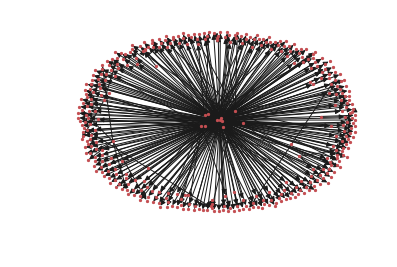

In [111]:
nx.draw_networkx(Gc_1129,with_labels=False,node_size=5)
plt.axis('off')
plt.savefig('fact_RT_1129.eps', dpi=400, bbox_inches='tight')

In [4]:
def get_properties(network_path):
    fact_id=network_path.split("/")[-1].split(".")[0].split("_")[-1]
    
    Gpd=pd.read_pickle(network_path)
    no_urls=Gpd[["canonical_url_updated"]].drop_duplicates().shape[0]
    
    
    Gpd=Gpd[['from_user_id','to_user_id','tweet_created_at','tweet_type']].drop_duplicates()
    Gc = nx.Graph() 
    for j in  Gpd[['from_user_id','to_user_id','tweet_created_at','tweet_type']].values:
        Gc.add_edge(j[0], j[1], time_stamp=j[2], tweet_type=j[3])
      
    network_properties=[]
    try:
        if Gc.number_of_nodes()>1:
            network_properties.append(fact_id)
            network_properties.append(no_urls)
            
            network_properties.append(Gc.number_of_nodes())
            network_properties.append(Gc.number_of_edges())
            network_properties.append(nx.density(Gc))
            
            network_properties.append(nx.number_connected_components(Gc))
            
            cc_Gc=nx.connected_component_subgraphs(Gc)
            largest_Gc = max(cc_Gc, key=len)
            network_properties.append(largest_Gc.number_of_nodes())
 
            network_properties.append(nx.transitivity(Gc))
            network_properties.append(nx.degree_assortativity_coefficient(Gc))
        
            network_property_matrix.append(network_properties)
    except ValueError:
        print('error')
        
    print("[completed]",fact_id)
    

In [5]:
network_property_matrix=[]
for pathx in glob.glob("%s/*.pkl.gz"%path):
    pool.add_task(get_properties,pathx)
pool.wait_completion()

[completed] 2851
[completed] 2803
[completed] 2077
[completed] 320
[completed] 2429
[completed] 1827
[completed] 28
[completed] 1115
[completed] 2518
[completed] 638
[completed] 1405
[completed] 2714
[completed] 1703
[completed] 2611
[completed] 380
[completed] 2362
[completed] 3080
[completed] 1085
[completed] 1950
[completed] 548
[completed] 165
[completed] 674
[completed] 463
[completed] 2375
[completed] 1181
[completed] 3118
[completed] 2164
[completed] 940
[completed] 1920
[completed] 2179
[completed] 594
[completed] 2887
[completed] 1075
[completed] 2722
[completed] 2958
[completed] 1635
[completed][completed] 2742
 3178
[completed] 711
[completed] 2136
[completed] 2145
[completed] 2494
[completed] 1353
[completed] 2873
[completed] 2541
[completed] 284
[completed] 2121
[completed] 2086
[completed] 1912
[completed] 3224
[completed] 536
[completed] 1374
[completed] 3245
[completed] 387
[completed] 1846
[completed] 3114
[completed] 2205
[completed] 1781
[completed] 2677
[completed] 

[completed] 1779
[completed] 2805
[completed] 2212
[completed] 2039
[completed] 531
[completed][completed] 83
 [completed] 128
2509[completed] 74

[completed] 1802
[completed] 1089
[completed] 204
[completed] [completed] 2452
1486
[completed] 2560
[completed] 1900
[completed] 1375
[completed] 2655
[completed] 247
[completed] 2096
[completed] 3149
[completed] 2540
[completed] 7
[completed] 766
[completed] 1186
[completed] 797
[completed] 1619
[completed] 1921
[completed] 464[completed] 559

[completed] 1030
[completed] 2699
[completed] 2659
[completed] 164
[completed] 444
[completed] 835
[completed] 2629
[completed][completed][completed]  1995
2485
 780
[completed] 1236
[completed] 1572
[completed] 2180
[completed] 1509
[completed] 1587
[completed] 1815
[completed] 595
[completed] 2288
[completed] 2191
[completed] 1006
[completed] 124
[completed][completed]  2353
254[completed]
[completed] 2269
 1081
[completed] 1886
[completed] 2019
[completed][completed] 2468
 862
[completed] 29
[comp

[completed] 1800
[completed] 3095
[completed] 2687
[completed][completed] 2869
 2241
[completed] 2058
[completed][completed] 423 2894

[completed][completed] 281
 1345
[completed] 633
[completed] 437
[completed] 2428[completed] 636

[completed] 2661
[completed] 2028
[completed][completed] 326
 [completed] 2915
929
[completed] 3246
[completed] 609
[completed][completed] [completed] 2826
 1016
1946
[completed] 3136
[completed] 2297
[completed] 1736
[completed] 906
[completed] 1261
[completed] 2678
[completed] 544
[completed] 801
[completed] 1442
[completed] 1331
[completed] 2592
[completed] 1318
[completed] 1202
[completed] 48
[completed] 357
[completed] 581
[completed] 2515
[completed] 751
[completed] 986
[completed][completed]  1311
851
[completed] 2022[completed] 2749

[completed] 3148
[completed] 2603
[completed] 3195
[completed] 2244
[completed] 642
[completed] [completed] 646
829
[completed] 58
[completed] 1951
[completed][completed] 3171
 2222
[completed] 2833
[completed] 388[comp

[completed] 2576
[completed] 655
[completed] 874
[completed] 2761
[completed] [completed] 134
2394
[completed] 282
[completed] 2499
[completed] 1083
[completed] 2189
[completed] [completed][completed]135
[completed] 735
 364
 425
[completed] 1811
[completed] 2626
[completed] 1408
[completed] 3009
[completed] 855
[completed][completed] 220
[completed][completed] 818
 2128
 2010
[completed][completed] 2444
 [completed] 448
2954
[completed] 955
[completed] 101
[completed] 1304
[completed] 1334
[completed] 2882
[completed] 3265
[completed] 3255
[completed] 1168
[completed] 810
[completed][completed] 2044
[completed] 620
 2163
[completed] 222
[completed] 2843
[completed] 590
[completed] 358
[completed] 1908
[completed] 898
[completed] [completed]3248
[completed] 1339
 3187
[completed][completed] 3036
 689
[completed] 1495
[completed] 2817
[completed][completed] 2806
 426
[completed] 3267
[completed][completed] 1890
 1451
[completed] 2875
[completed] 2267
[completed] 836
[completed] 3229
[co

[completed] 558
[completed] 2835
[completed] 1851
[completed][completed] 2158
 2006
[completed] 1985
[completed] 2702
[completed] 2994
[completed][completed] 270
 306
[completed] 725
[completed][completed] 365
 3206
[completed] 1410
[completed] 2813
[completed] 3104
[completed] 901
[completed] 2597
[completed] 1657
[completed][completed] 1698
[completed] 1385
 1424
[completed] 2088
[completed] 2794
[completed] 1526
[completed] 1559
[completed] 2849
[completed] 1107
[completed] 2475
[completed] 269
[completed] 1795
[completed] 1735
[completed] 3126
[completed] 709
[completed] 2963
[completed] 3101
[completed] 784
[completed] 1295
[completed] 1939
[completed][completed] 285
[completed] 1274
[completed] 1036
 912
[completed] 2884
[completed][completed] 109
 713
[completed] 3043
[completed] 1556
[completed] 508
[completed][completed] 1275
 [completed] 2385
660
[completed][completed] 1141
 1392
[completed][completed] 1810
 809
[completed] 1208
[completed] 1082
[completed] 2936
[completed] 2

[completed] 2198
[completed] 419
[completed] 3024
[completed] 534
[completed][completed] 2045
[completed] 960
 1649
[completed] 2649
[completed] 864
[completed] 3013
[completed] 399
[completed] 1352
[completed] [completed]2104
 2839
[completed] 2693
[completed] 2443
[completed] 2552
[completed] 570
[completed][completed] 2610
 1007
[completed] 1517
[completed] 2427
[completed] 1166
[completed] 842
[completed][completed] 1416
 814
[completed] 3007
[completed] 745
[completed] 847
[completed] 2525
[completed] 771
[completed] 2728
[completed] 2185
[completed] 804
[completed] 1962
[completed] 1214
[completed] 3082
[completed] 2076
[completed] 3071
[completed] 1108
[completed] 2630
[completed] 1403
[completed] 736
[completed] 2119
[completed] 2260
[completed] [completed] 1872[completed] 2020476

[completed] 466

[completed][completed] 3251 1163
[completed] 1231

[completed] 163
[completed] 2188
[completed] 2516
[completed] 3239
[completed] 2847[completed] 1555

[completed] 603
[completed] 16

[completed] 2563
[completed] 681
[completed] 1548
[completed] 2511
[completed] 2857
[completed] 1595
[completed] 428
[completed] 2877
[completed][completed] 2889[completed] 276
 1217

[completed] 2152
[completed] 1162
[completed] 2301
[completed] 757
[completed] 2291
[completed] 362
[completed] 795
[completed] 2261
[completed] 2896
[completed] 933
[completed] 2040
[completed] 3138
[completed] 1567
[completed][completed] 3173
[completed] 50[completed]
 915
[completed] 321
[completed] 379
 1306
[completed] 2795
[completed] 1523
[completed] 233
[completed] 869
[completed] 2744
[completed] 1640
[completed] 1370
[completed] 3154
[completed] 2804
[completed] 376
[completed] 1117
[completed] 1232
[completed] 1211
[completed] 2604
[completed] 703
[completed] 182
[completed] 2881
[completed] 579
[completed] 881
[completed] 424
[completed] 2193
[completed] 1743
[completed] 1299
[completed] 1809
[completed] 395
[completed] 575
[completed] 2462
[completed] 2695
[completed] 1828
[completed] 1777
[c

Exception in thread Thread-377:
Traceback (most recent call last):
  File "/usr/local/conda/anaconda3/lib/python3.6/site-packages/ipykernel/iostream.py", line 97, in _event_pipe
    event_pipe = self._local.event_pipe
AttributeError: '_thread._local' object has no attribute 'event_pipe'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/data/Hoaxy/code/Hoaxy/near-dup-detection/ndd/lib_job_thread.py", line 24, in run
    func(*args, **kargs)
  File "<ipython-input-4-b02919a10b6e>", line 36, in get_properties
    print("[completed]",fact_id)
  File "/usr/local/conda/anaconda3/lib/python3.6/site-packages/ipykernel/iostream.py", line 376, in write
    self.pub_thread.schedule(lambda : self._buffer.write(string))
  File "/usr/local/conda/anaconda3/lib/python3.6/site-packages/ipykernel/iostream.py", line 203, in schedule
    self._event_pipe.send(b'')
  File "/usr/local/conda/anaconda3/lib/python3.6/site-packages/ipykernel/iostre

In [6]:
network_property=pd.DataFrame(network_property_matrix,columns=['fact_id','no_urls','no_nodes','no_edges','density','no_connected_components','size_largest_cc','transitivity','degree_assortativity_coefficient'])

In [7]:
network_property.to_pickle("fact_RT_network_property.pkl.gz")

In [2]:
network_property=pd.read_pickle("fact_RT_network_property.pkl.gz")

In [3]:
network_property.head()

,fact_id,no_urls,no_nodes,no_edges,density,no_connected_components,size_largest_cc,transitivity,degree_assortativity_coefficient
0,2851,1,2,1,1.000000,1,2,0.0,NaN
1,2803,2,7,6,0.285714,1,7,0.0,-0.448276
2,320,2,196,185,0.009681,11,107,0.0,-0.530200
3,638,2,61,59,0.032240,2,53,0.0,-0.685149
4,2714,1,6,3,0.200000,3,2,0.0,NaN


In [7]:
network_property['no_urls']=network_property['no_urls'].astype(int)

In [10]:
network_property.fillna(0,inplace=True)

In [24]:
network_property["fraction_of_largest_cc"]=network_property['size_largest_cc']/network_property['no_nodes']

In [25]:
network_property.describe()

,no_urls,no_nodes,no_edges,density,no_connected_components,size_largest_cc,transitivity,degree_assortativity_coefficient,fraction_of_largest_cc
count,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000,2349.000000
mean,2.039591,249.124734,256.603661,0.136479,8.813112,215.318859,0.002729,-0.527676,0.681251
std,12.001301,806.567205,938.818890,0.240481,14.308046,781.747793,0.032055,0.241107,0.255637
min,1.000000,2.000000,1.000000,0.000209,1.000000,2.000000,0.000000,-1.000000,0.057143
25%,1.000000,12.000000,9.000000,0.011006,2.000000,6.000000,0.000000,-0.666667,0.467213
50%,2.000000,43.000000,36.000000,0.039778,5.000000,21.000000,0.000000,-0.527758,0.712042
75%,2.000000,173.000000,165.000000,0.128205,10.000000,115.000000,0.000031,-0.409352,0.925996
max,580.000000,10873.000000,17192.000000,1.000000,272.000000,10660.000000,1.000000,0.550000,1.000000


In [105]:
network_property[network_property["no_nodes"]<5]

,fact_id,no_urls,no_nodes,no_edges,density,no_connected_components,size_largest_cc,transitivity,degree_assortativity_coefficient,fraction_of_largest_cc
0,2851,1,2,1,1.000000,1,2,0.0,0.000000,1.0
5,2611,1,4,2,0.333333,2,2,0.0,0.000000,0.5
19,2887,2,2,1,1.000000,1,2,0.0,0.000000,1.0
30,1912,1,2,1,1.000000,1,2,0.0,0.000000,1.0
53,1314,1,3,2,0.666667,1,3,0.0,-1.000000,1.0
66,587,1,2,1,1.000000,1,2,0.0,0.000000,1.0
79,3041,1,3,2,0.666667,1,3,0.0,-1.000000,1.0
96,1652,1,3,2,0.666667,1,3,0.0,-1.000000,1.0
110,1088,1,2,1,1.000000,1,2,0.0,0.000000,1.0
133,10,1,4,2,0.333333,2,2,0.0,0.000000,0.5


In [106]:
network_property[network_property["fact_id"]=='1129']

,fact_id,no_urls,no_nodes,no_edges,density,no_connected_components,size_largest_cc,transitivity,degree_assortativity_coefficient,fraction_of_largest_cc
834,1129,5,370,350,0.005127,20,262,0.0,-0.604434,0.708108


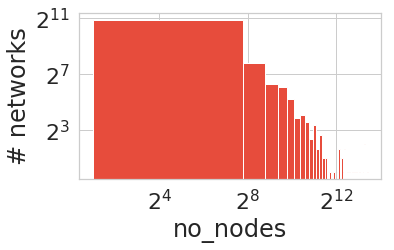

In [52]:
network_property["no_nodes"].plot(kind='hist',bins=50,color="#e74c3c")
plt.xscale('log',basex=2)
plt.yscale('log',basey=2)
plt.xlabel('no_nodes')
plt.ylabel('# networks')
plt.tight_layout()
plt.savefig("./plots/no_nodes_fact_RT.eps")

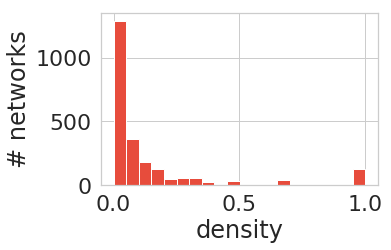

In [53]:
network_property["density"].plot(kind='hist',bins=20,color="#e74c3c")
plt.xlabel('density')
plt.ylabel('# networks')
plt.tight_layout()
plt.savefig("./plots/density_fact_RT.eps")

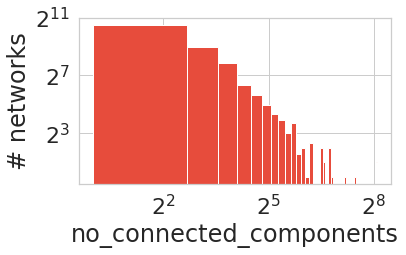

In [54]:
network_property["no_connected_components"].plot(kind='hist',bins=50,color="#e74c3c")
plt.xscale('log',basex=2)
plt.yscale('log',basey=2)
plt.xlabel('no_connected_components')
plt.ylabel('# networks')
plt.tight_layout()
plt.savefig("./plots/no_cc_fact_RT.eps")

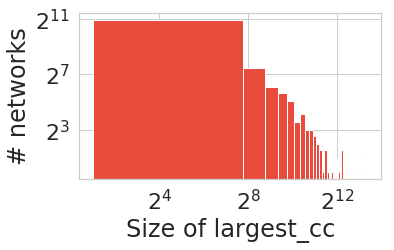

In [62]:
network_property["size_largest_cc"].plot(kind='hist',bins=50,color="#e74c3c")
plt.xscale('log',basex=2)
plt.yscale('log',basey=2)
plt.xlabel('Size of largest_cc')
plt.ylabel('# networks')
plt.tight_layout()
plt.savefig("./plots/size_largest_cc_fact_RT.eps")

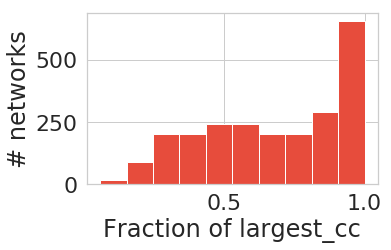

In [55]:
network_property["fraction_of_largest_cc"].plot(kind='hist',bins=10,color="#e74c3c")
plt.xlabel('Fraction of largest_cc')
plt.ylabel('# networks')
plt.tight_layout()
plt.savefig("./plots/fraction_largest_cc_fact_RT.eps")

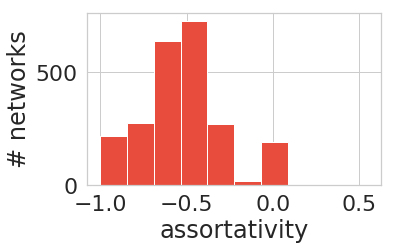

In [56]:
network_property["degree_assortativity_coefficient"].plot(kind='hist',bins=10,color="#e74c3c")
plt.xlabel('assortativity')
plt.ylabel('# networks')
plt.tight_layout()
plt.savefig("./plots/assortativity_fact_RT.eps")

Text(0,0.5,'# networks')

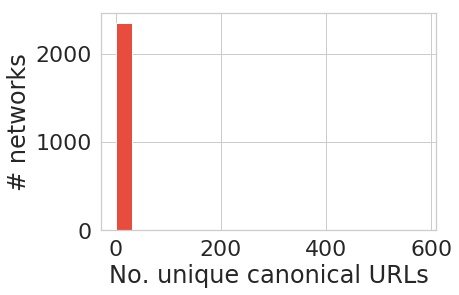

In [59]:
network_property["no_urls"].plot(kind='hist',bins=20,color="#e74c3c")
plt.xlabel('No. unique canonical URLs')
plt.ylabel('# networks')